In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **Data Loading and Dummy Model Submission file generation**

In [2]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load training data
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train a DummyClassifier
model = DummyClassifier().fit(X, y)

# Predict on the training set to evaluate accuracy on it
y_train_pred = model.predict(X)

# Calculate accuracy score on training data
accuracy = accuracy_score(y, y_train_pred)
print("Training Accuracy: ", accuracy)

# Predict on the test data
X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
y_pred = model.predict(X_test)



# Create a submission DataFrame for test data predictions
''''''
submission = pd.DataFrame({
    'id': range(0, X_test.shape[0]),  # Use 'id' from test if it exists
    'target': y_pred  # Predictions from the model
})

# Save submission file
submission.to_csv('submission.csv', index=False)


Training Accuracy:  0.8513937415521154


# **Analyzing Data**

In [3]:
df.describe(include = ['category', 'object']) # Summary on Categorical Data

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
count,39211,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,1013,11,3,3,2,2,2,2,3,2
top,2009-05-15,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,313,7776,22691,19584,36954,21657,31820,25030,4949,33384


In [4]:
df[df['default'] == 'no'].shape[0]

36954

In [5]:
df[df['default'] == 'yes'].shape[0]

2257

In [6]:
c = 0
for i in df.columns:
    print(f" column {c+1} : {i} \n {df[i].unique()}")      # All column uniques
    c += 1
    print()

 column 1 : last contact date 
 ['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']

 column 2 : age 
 [26 52 44 33 31 25 46 37 38 32 28 34 86 42 58 39 35 47 45 48 30 50 56 54
 40 53 41 51 27 29 57 63 36 43 19 55 49 23 83 60 22 80 76 59 24 93 71 89
 64 68 85 79 62 69 20 90 66 87 72 88 67 70 77 91 78 61 65 73 74 84 82 92
 81 18 21 75 94 95]

 column 3 : job 
 ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]

 column 4 : marital 
 ['married' 'single' 'divorced']

 column 5 : education 
 ['secondary' 'tertiary' 'primary' nan]

 column 6 : default 
 ['no' 'yes']

 column 7 : balance 
 [  647   553  1397 ...  4307  6187 38594]

 column 8 : housing 
 ['yes' 'no']

 column 9 : loan 
 ['no' 'yes']

 column 10 : contact 
 ['cellular' 'telephone' nan]

 column 11 : duration 
 [ 357  160  326 ... 3506 4144 1631]

 column 12 : campaign 
 [ 2  1  3  4  6 45  5 44 12 61 58 

In [7]:
df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [8]:
df.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


In [9]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.isna().any()   # Null having columns

last contact date    False
age                  False
job                   True
marital              False
education             True
default              False
balance              False
housing              False
loan                 False
contact               True
duration             False
campaign             False
pdays                False
previous             False
poutcome              True
target               False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

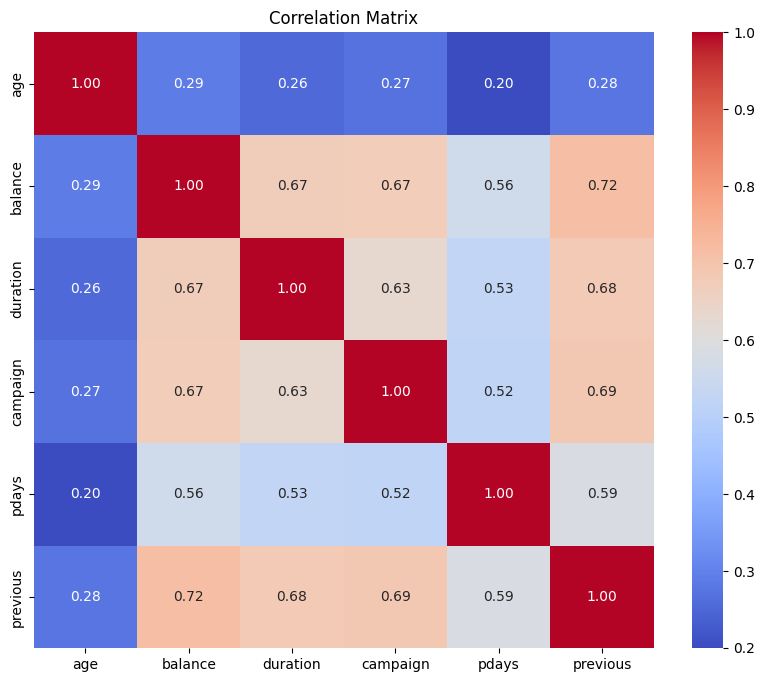

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix on selected numerical features 
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] 
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") #fmt=".2f",format the correlation values to two decimal places
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.shape

(39211, 16)

In [14]:
df.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

<Axes: >

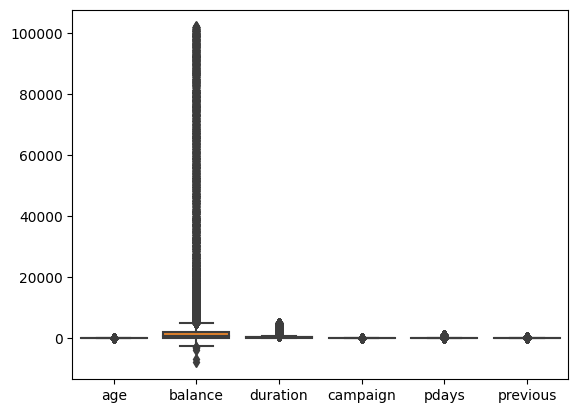

In [15]:
sns.boxplot(df)


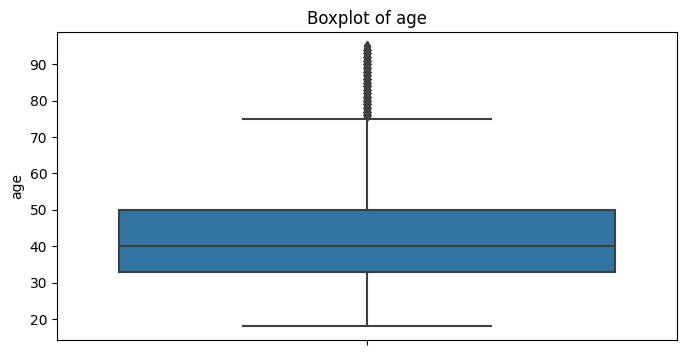

count    39211.000000
mean        42.120247
std         12.709352
min         18.000000
25%         33.000000
50%         40.000000
75%         50.000000
max         95.000000
Name: age, dtype: float64


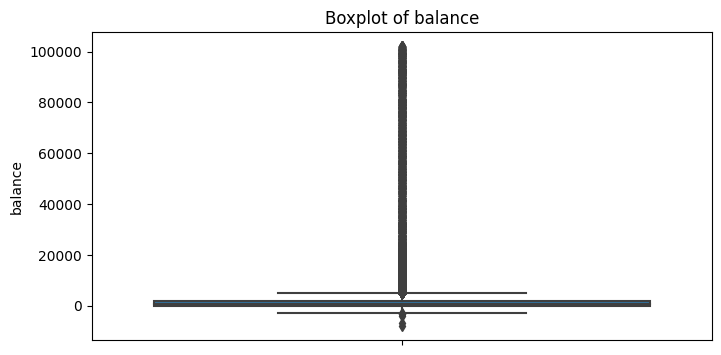

count     39211.000000
mean       5441.781719
std       16365.292065
min       -8019.000000
25%          98.000000
50%         549.000000
75%        2030.000000
max      102127.000000
Name: balance, dtype: float64


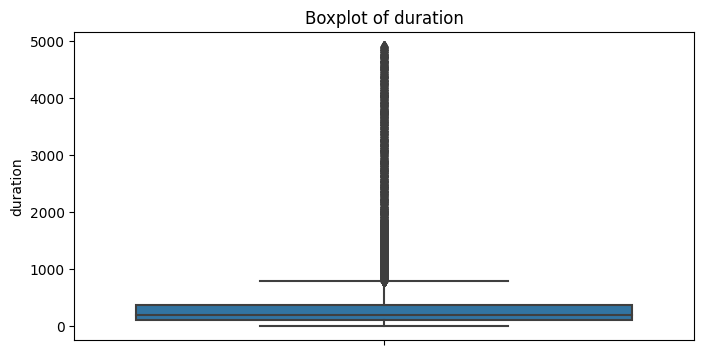

count    39211.000000
mean       439.062789
std        769.096291
min          0.000000
25%        109.000000
50%        197.000000
75%        380.000000
max       4918.000000
Name: duration, dtype: float64


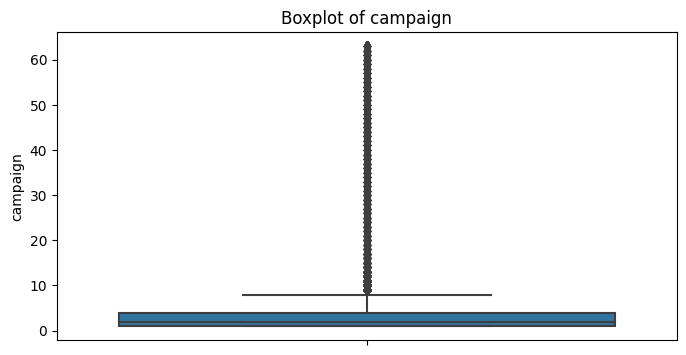

count    39211.000000
mean         5.108770
std          9.890153
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         63.000000
Name: campaign, dtype: float64


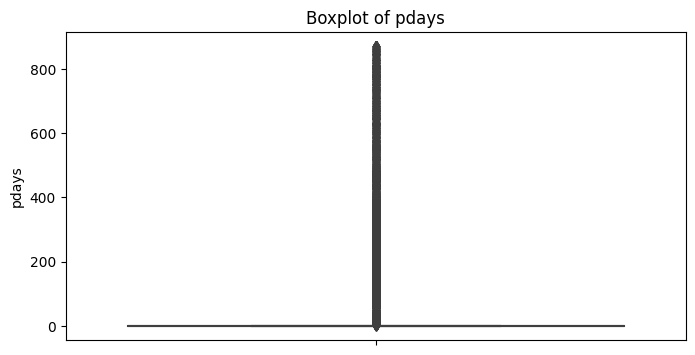

count    39211.000000
mean        72.256051
std        160.942593
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


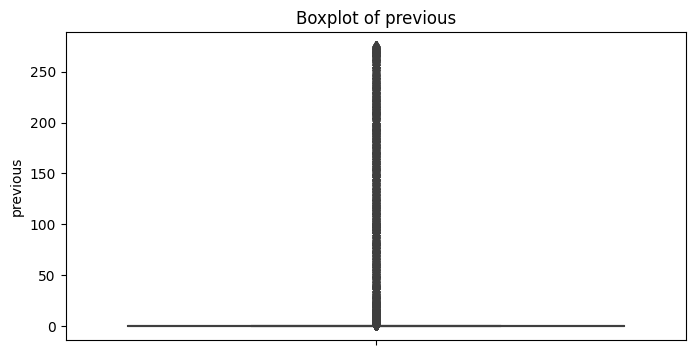

count    39211.000000
mean        11.826171
std         44.140259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


In [16]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=['number']).columns:
   plt.figure(figsize=(8, 4))
   sns.boxplot(y=col, data=df)
   plt.title(f'Boxplot of {col}')
   plt.show()
   print(df[col].describe())

In [17]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)


['last contact date', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']


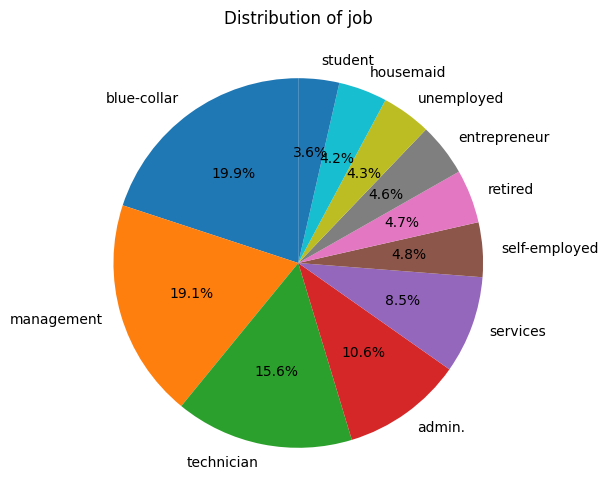

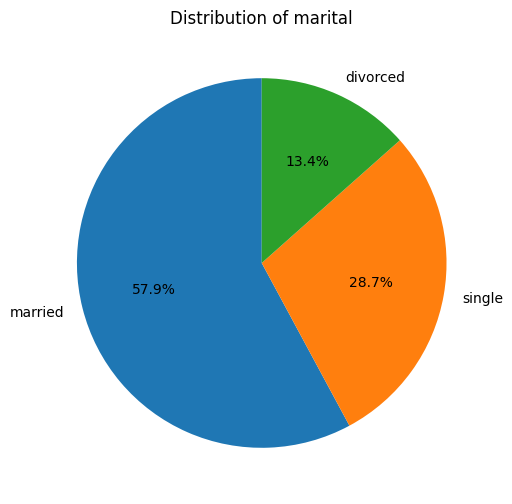

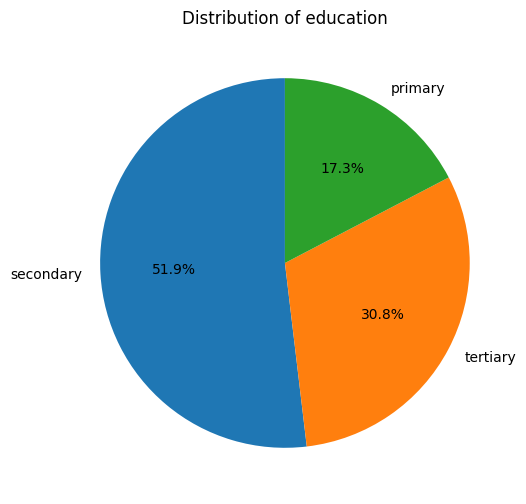

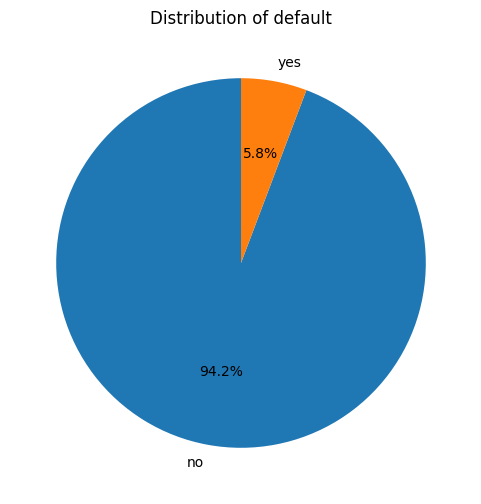

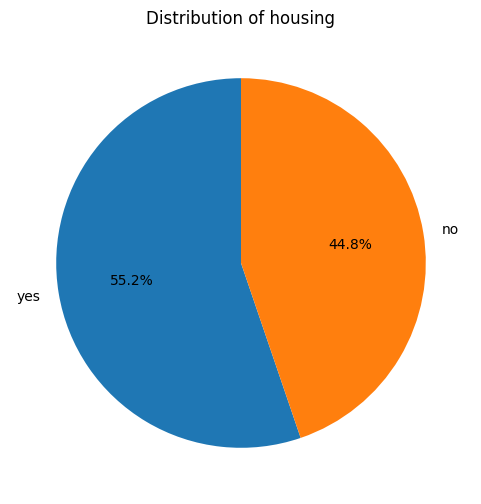

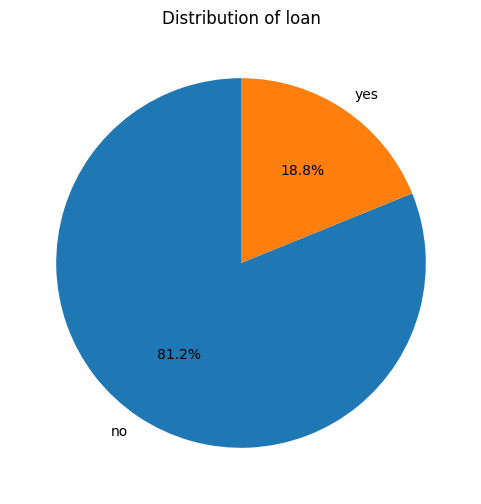

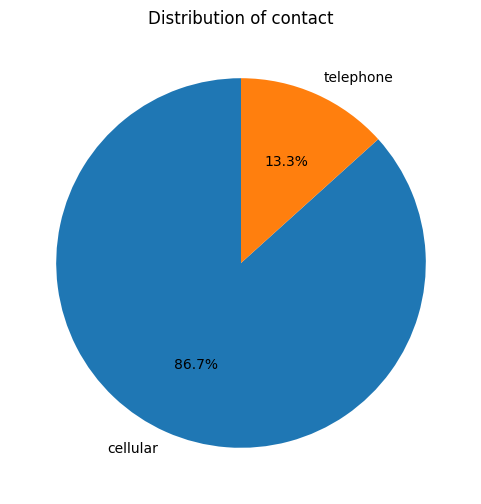

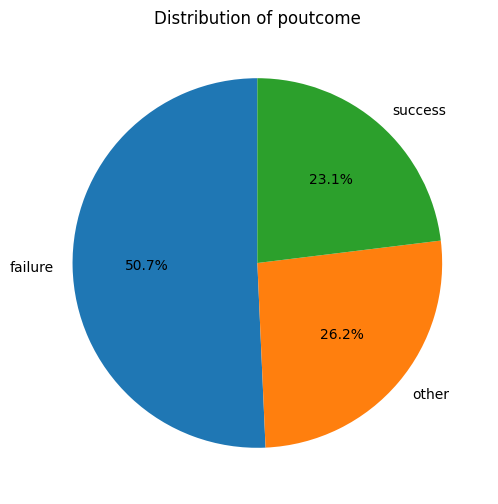

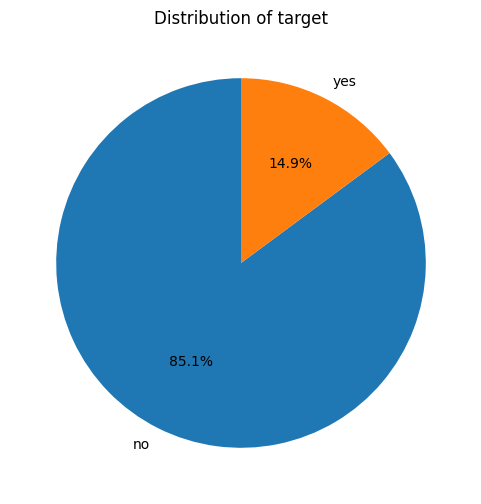

In [18]:
import matplotlib.pyplot as plt

for i in categorical_columns[1:]:
    plt.figure(figsize=(6, 6))  # Create a new figure for each chart
    df[i].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)  
    plt.title(f'Distribution of {i}')  # Add a clear title
    plt.ylabel('')  # Remove unnecessary y-axis label
    plt.show()

# **Data  Cleaning**

                age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  
       last contact date          job  marital  education default housing  \
coun

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


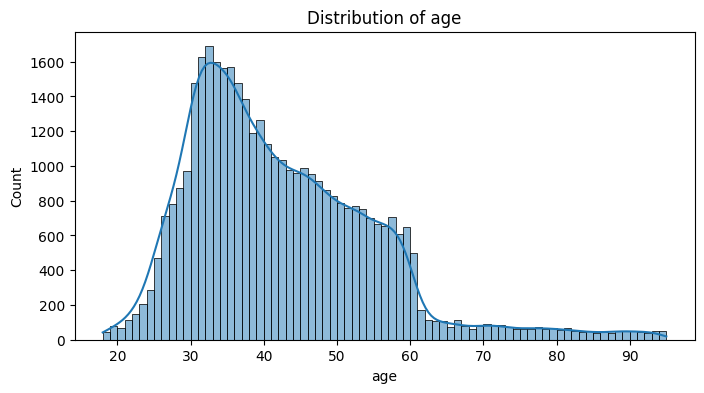

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


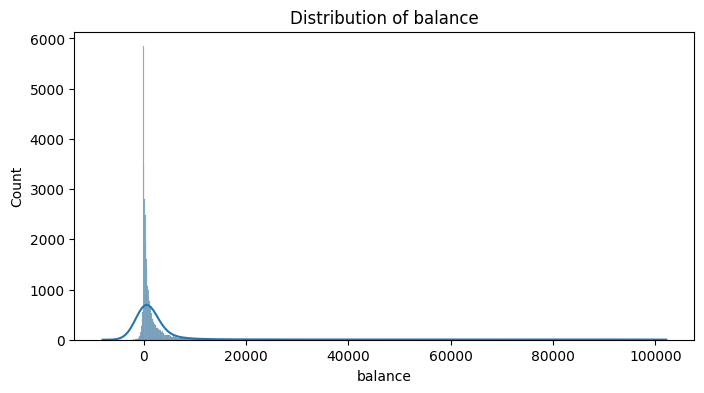

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


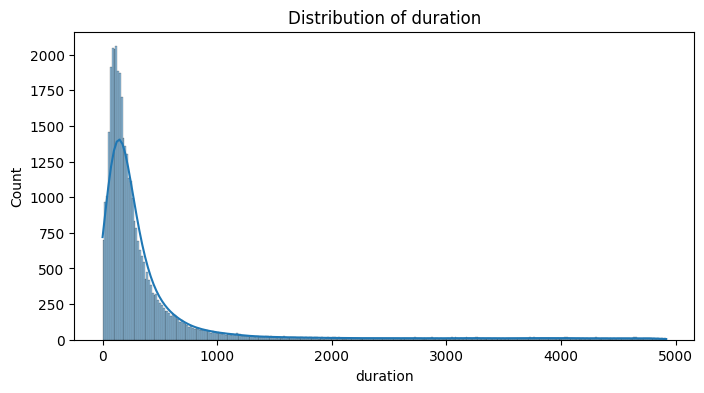

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


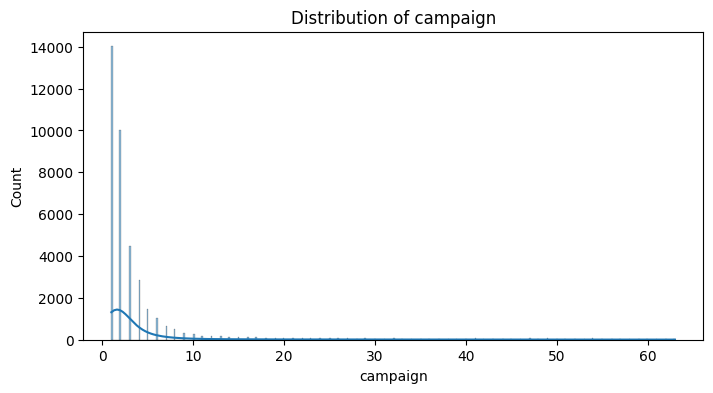

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


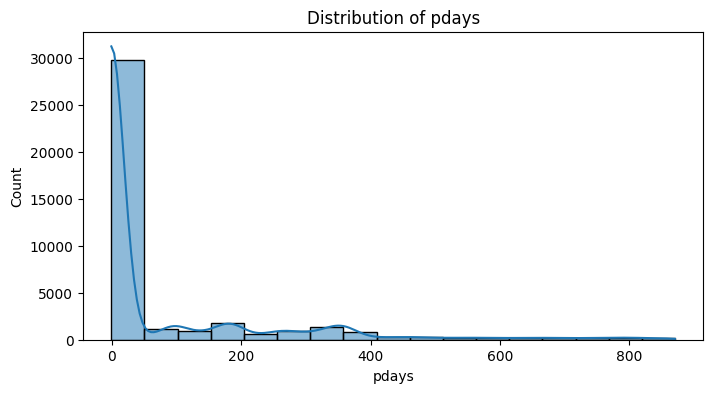

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


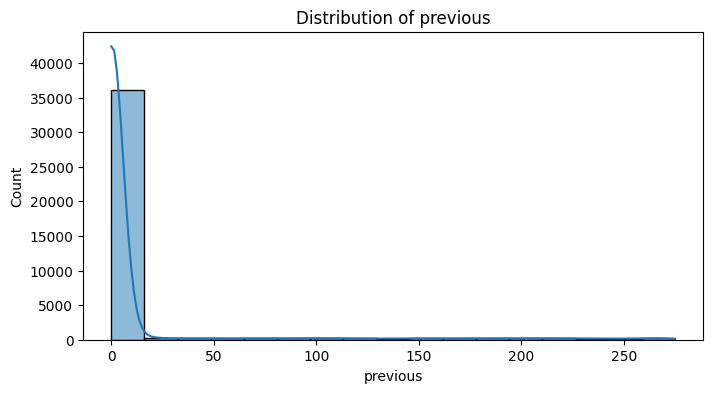

In [19]:
import seaborn as sns
# Descriptive statistics for numerical columns
print(df.describe())

# Descriptive statistics for categorical columns
print(df.describe(include=['object', 'category']))



#specific column's distribution
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [20]:
df.dtypes

last contact date    object
age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
target               object
dtype: object

In [21]:
df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [22]:
df[df['job'].isnull()]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
256,2009-08-19,40,NaN,married,tertiary,no,119,no,no,cellular,258,2,-1,0,NaN,no
490,2010-05-29,41,NaN,single,secondary,no,646,yes,no,NaN,40,2,-1,0,NaN,no
564,2008-05-28,57,NaN,married,NaN,no,327,yes,no,NaN,74,2,-1,0,NaN,no
768,2010-08-04,52,NaN,married,NaN,no,1571,no,no,cellular,164,1,-1,0,NaN,no
790,2009-06-16,54,NaN,married,secondary,no,1241,no,no,NaN,97,6,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38048,2009-06-11,51,NaN,married,NaN,no,12,no,no,NaN,45,1,-1,0,NaN,no
38549,2009-08-21,36,NaN,married,primary,no,0,no,no,cellular,238,2,-1,0,NaN,no
38597,2009-06-05,59,NaN,married,primary,no,1470,no,no,NaN,74,1,-1,0,NaN,no
38637,2008-08-25,52,NaN,married,secondary,no,142,no,no,cellular,112,6,-1,0,NaN,no


# **ML end-to-end process again with insights into the dataset** 

--- Logistic Regression ---
Best Parameters: {'model__C': 10}
Validation Accuracy: 0.85541246971822
Validation F1-Score: 0.31850961538461536
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6645
           1       0.57      0.22      0.32      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843

--- Random Forest ---
Best Parameters: {'model__max_depth': 15, 'model__n_estimators': 100}
Validation Accuracy: 0.8621700879765396
Validation F1-Score: 0.46405552801189887
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6645
           1       0.57      0.39      0.46      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.67      0.69      7843
weighted avg       0.85      0.86      0.85      7843

--- Gradient Boosting ---
Best P

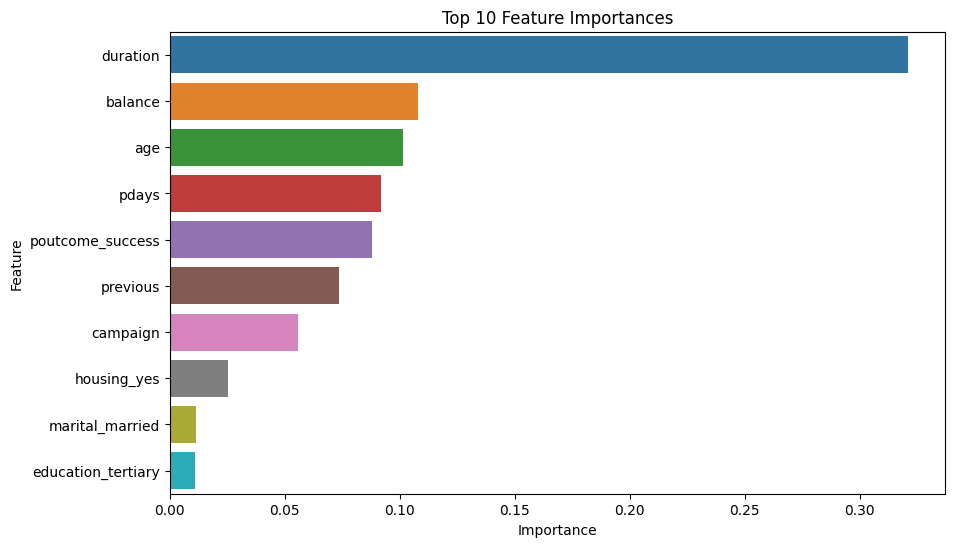

In [23]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Scales numerical data to have zero mean and unit variance, 
# For low cardinality categories columns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")



# Data Preprocessing
# Ensure the target variable is binary encoded
if train_data['target'].dtype == 'object':
    train_data['target'] = train_data['target'].map({'no': 0, 'yes': 1})

# Define numerical and categorical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])




# Training and Evaluation
# Split
X = train_data.drop('target', axis=1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {'model__C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'model__n_estimators': [100, 200, 300], 'model__learning_rate': [0.01, 0.1, 0.2]})
}

best_model = None
best_score = 0
results = {}

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    results[model_name] = {'accuracy': accuracy, 'f1_score': f1}

    print(f"--- {model_name} ---")
    print("Best Parameters:", grid_search.best_params_)
    print("Validation Accuracy:", accuracy)
    print("Validation F1-Score:", f1)
    print(classification_report(y_val, y_pred))

    if accuracy > best_score:
        best_score = accuracy
        best_model = grid_search.best_estimator_




#Predictions and Submission
X_test = test_data  # Assuming test data has no target column and matches training structure
y_pred_test = best_model.predict(X_test)


y_pred_test_mapped = pd.Series(y_pred_test).map({0: 'no', 1: 'yes'})

# Create the submission file
submission = pd.DataFrame({
    'id': test_data['id'] if 'id' in test_data.columns else range(len(test_data)),
    'target': y_pred_test_mapped
})

submission.to_csv('submission.csv', index=False)





# Feature Importance
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    importance = best_model.named_steps['model'].feature_importances_
    feature_names = numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(categorical_features))
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Feature Importances')
    plt.show()
